In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df_events = pd.read_csv("events.csv", dtype={"application_id":"int8", "event_id":"int8"})

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_events.sort_values(by=["ip_address"]).head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
78094,2019-03-07 14:39:00.166,-94,1494519392962156891,4897338357638817900,103,False,6333597102633388268,4.353750e+18,NaN,1.187661e+17,...,NaN,NaN,0bf3717a-467b-4ee8-82c3-5e611deb6bbc,3.570805e+18,3.209078e+18,6.941825e+18,NaN,Cable/DSL,5287755497790,3.301378e+18
76830,2019-03-07 14:38:21.082,-95,1494519392962156891,4897338357638817900,103,False,6333597102633388268,4.353750e+18,NaN,1.187661e+17,...,NaN,NaN,92f559cf-cc70-4d0e-965c-4c3be5e09321,3.570805e+18,9.066788e+18,6.941825e+18,NaN,Cable/DSL,5287755497790,3.301378e+18
713926,2019-03-12 10:37:06.568,-95,1494519392962156891,41614654414054753,103,False,6333597102633388268,4.353750e+18,NaN,2.928262e+18,...,NaN,NaN,231ebd9f-5ab2-410f-a0b0-fe535c4fa9c0,2.248157e+17,9.066788e+18,6.941825e+18,NaN,Cable/DSL,87345868419849,3.301378e+18
714662,2019-03-10 15:13:05.468,-95,1494519392962156891,4872395157768010768,103,False,6333597102633388268,4.353750e+18,NaN,1.187661e+17,...,NaN,NaN,9f740aaa-826b-4b47-b1a8-5c2745c72675,2.248157e+17,9.066788e+18,6.941825e+18,NaN,Cable/DSL,87345868419849,3.301378e+18
714984,2019-03-10 15:13:13.086,-94,1494519392962156891,4872395157768010768,103,False,6333597102633388268,4.353750e+18,NaN,1.187661e+17,...,NaN,NaN,f9116527-8176-4006-a364-8a160edfb05f,2.248157e+17,3.209078e+18,6.941825e+18,NaN,Cable/DSL,87345868419849,3.301378e+18


In [6]:
df_events["cant_events"] = 1

In [7]:
df_events.isnull().sum()

date                        0
event_id                    0
ref_type                    0
ref_hash                    0
application_id              0
attributed                  0
device_countrycode          0
device_os_version     1472357
device_brand          1329460
device_model            87967
device_city           1879725
session_user_agent      11786
trans_id              2494341
user_agent            1102896
event_uuid               5099
carrier               1877989
kind                     5099
device_os             1836756
wifi                  1115551
connection_type       1881960
ip_address                  0
device_language         87819
cant_events                 0
dtype: int64

In [8]:
df_events["ref_type"].unique()

array([1891515180541284343, 1494519392962156891])

In [9]:
df_installs = pd.read_csv("installs.csv")
df_installs["cant_installs"] = 1

In [10]:
df_installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,cant_installs
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,1
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,1
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,1
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,1


In [11]:
installs_ip = df_installs[["ip_address", "cant_installs"]].groupby("ip_address").agg({"cant_installs":"sum"})
events_ip = df_events[["ip_address", "cant_events"]].groupby("ip_address").agg({"cant_events":"sum"})

In [55]:
installs_ip.reset_index()
events_ip.reset_index()

,ip_address,cant_events
0,5287755497790,2
1,87345868419849,7
2,167995586414012,1
3,192556001908321,3
4,346238166155581,3
5,352441518972193,118
6,352941359168100,1
7,363418059153523,4
8,403365767215374,4
9,450061209240601,2


In [63]:
plot_ip = events_ip.merge(installs_ip, on="ip_address", how="outer")
plot_ip["cant_installs"][plot_ip["cant_installs"].isnull()] = 0
plot_ip

,cant_events,cant_installs
ip_address,,
5287755497790,2.0,0.0
87345868419849,7.0,0.0
167995586414012,1.0,0.0
192556001908321,3.0,0.0
346238166155581,3.0,0.0
352441518972193,118.0,0.0
352941359168100,1.0,0.0
363418059153523,4.0,0.0
403365767215374,4.0,0.0


### No me sirven las instalaciones de la gente que no sé qué eventos realizó.

In [64]:
plot_ip_clean = plot_ip[~plot_ip["cant_events"].isnull()]

### Cantidad de personas y cantidad de instalaciones

In [65]:
plot_ip_clean["cantidad"] = 1
plot_ip_clean.groupby("cant_installs").agg({"cantidad":"sum"})

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cantidad
cant_installs,
0.0,282655
1.0,2151
2.0,325
3.0,34
4.0,21
5.0,8
6.0,1
7.0,5
9.0,2


In [66]:
cantidad_instalaciones = plot_ip_clean["cant_installs"].unique()

### Media de eventos por cantidad de instalaciones ( Cada 51 eventos se hace 1 instalación )

In [73]:
ploteo = plot_ip_clean.groupby("cant_installs").agg({"cant_events":"mean"})
ploteo

,cant_events
cant_installs,
0.0,7.564752
1.0,51.515574
2.0,129.329231
3.0,702.147059
4.0,1523.047619
5.0,2656.875000
6.0,661.000000
7.0,1957.800000
9.0,12186.000000


In [74]:
ploteo.reset_index(inplace=True)

<BarContainer object of 17 artists>

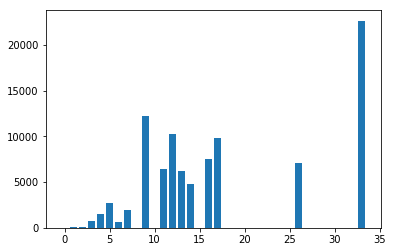

In [75]:
plt.bar(np.array(ploteo["cant_installs"]), np.array(ploteo["cant_events"]))